<a href="https://colab.research.google.com/github/kapibara3chi/DeepLearningPredictionOfScalarValue/blob/main/DeepLearningPredictionOfScalarValue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A.I.
- [ ] csvデータの読み込み
- [ ] 精度の確認方法
- [ ] 精度の改善方法

## モデルを外部出力する

## 外部モデルを参照する

# 0.pip

In [1]:
!pip install numpy tensorflow scikit-learn

# 基本コードの理解

## code

train data
data shape(404, 13)
data type:<class 'numpy.ndarray'>
data ex:[[1.23247e+00 0.00000e+00 8.14000e+00 ... 2.10000e+01 3.96900e+02
  1.87200e+01]
 [2.17700e-02 8.25000e+01 2.03000e+00 ... 1.47000e+01 3.95380e+02
  3.11000e+00]
 [4.89822e+00 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.75520e+02
  3.26000e+00]
 ...
 [3.46600e-02 3.50000e+01 6.06000e+00 ... 1.69000e+01 3.62250e+02
  7.83000e+00]
 [2.14918e+00 0.00000e+00 1.95800e+01 ... 1.47000e+01 2.61950e+02
  1.57900e+01]
 [1.43900e-02 6.00000e+01 2.93000e+00 ... 1.56000e+01 3.76700e+02
  4.38000e+00]]
行数:404,列数:13
13
Epoch 1/100
21/21 [==============================] - 2s 34ms/step - loss: 170.2796 - mae: 10.1508 - val_loss: 77.0840 - val_mae: 5.8615
Epoch 2/100
21/21 [==============================] - 0s 7ms/step - loss: 67.2988 - mae: 6.0835 - val_loss: 81.5575 - val_mae: 5.8247
Epoch 3/100
21/21 [==============================] - 0s 6ms/step - loss: 54.6762 - mae: 4.9566 - val_loss: 77.7057 - val_mae: 7.2008
Epoch 4/100
21/21

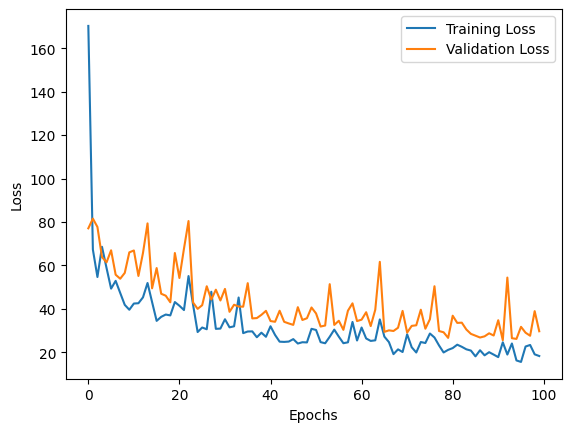

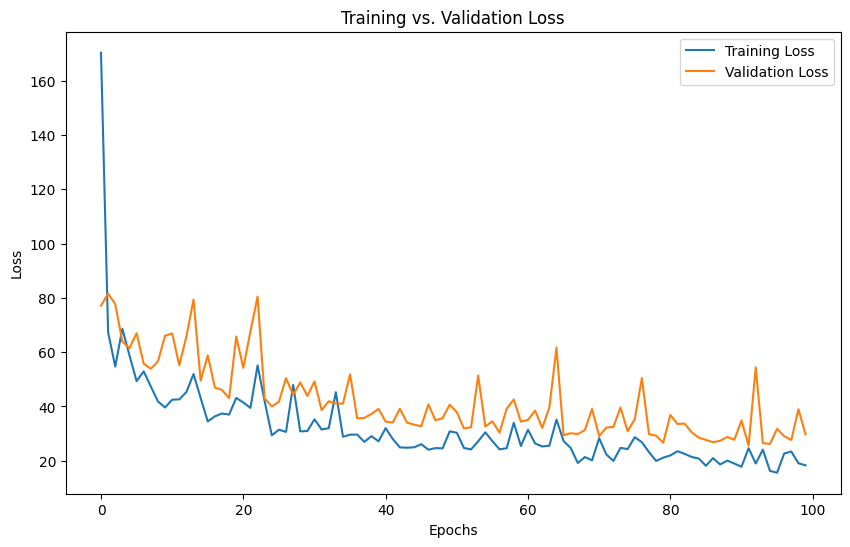

'\n# テストデータセット上で予測を行う\npredictions = model.predict(test_data)\n\n# 予測結果を出力する\nfor i, prediction in enumerate(predictions):\n    print(f"予測された住宅価格: {prediction[0]:.2f}, 実際の住宅価格: {test_labels[i]}")\n'

In [24]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import sys


# データの読み込み
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()
## データの確認
print("train data")
print(f"data shape{train_data.shape}")
print(f"data type:{type(train_data)}")
print(f"data ex:{train_data}")

num_rows,num_cols=train_data.shape
print(f"行数:{num_rows},列数:{num_cols}")
print(train_data.shape[1])
# モデルの定義
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
#input_shape:データ列数のタプル※単一次元なので(,)つき
model.add(Dense(64, activation='relu'))
model.add(Dense(1))  # 出力層

# モデルのコンパイル
# model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# モデルの学習
history=model.fit(train_data, train_labels, epochs=100, batch_size=16, validation_split=0.2)

# モデルの評価
test_loss, test_mae = model.evaluate(test_data, test_labels)
# test_loss, test_mae = model.evaluate(test_data, test_labels,verbose=1)
print(f"Test Loss:{test_loss:.3f}")
print(f"Test MAE: {test_mae:.2f}")


import matplotlib.pyplot as plt
# トレーニングと検証の損失をプロット
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# モデルの学習曲線をプロット
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()
plt.show()




'''
# テストデータセット上で予測を行う
predictions = model.predict(test_data)

# 予測結果を出力する
for i, prediction in enumerate(predictions):
    print(f"予測された住宅価格: {prediction[0]:.2f}, 実際の住宅価格: {test_labels[i]}")
'''




# 修正版

## code

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# データの読み込み
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 特徴エンジニアリング
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

# モデルの定義
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(Dense(1))  # 出力層

# モデルのコンパイル
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# データの分割
X_train, X_val, y_train, y_val = train_test_split(train_data_scaled, train_labels, test_size=0.2, random_state=42)

# モデルの学習
model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_val, y_val))

# テストデータで予測
predictions = model.predict(test_data_scaled)

# 予測結果の表示
for i in range(len(predictions)):
    print(f"Predicted price for test sample {i+1}: {predictions[i][0]:.2f}")


Epoch 1/100
21/21 [==============================] - 1s 13ms/step - loss: 578.0020 - mae: 21.9834 - val_loss: 399.1860 - val_mae: 18.4708
Epoch 2/100
21/21 [==============================] - 0s 4ms/step - loss: 484.7554 - mae: 19.6662 - val_loss: 300.9702 - val_mae: 15.6599
Epoch 3/100
21/21 [==============================] - 0s 4ms/step - loss: 335.5976 - mae: 15.6595 - val_loss: 164.1272 - val_mae: 11.0418
Epoch 4/100
21/21 [==============================] - 0s 4ms/step - loss: 153.3750 - mae: 9.8638 - val_loss: 58.3031 - val_mae: 6.1396
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 62.4075 - mae: 5.8590 - val_loss: 36.7153 - val_mae: 4.7353
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 42.9342 - mae: 4.6946 - val_loss: 27.6430 - val_mae: 4.0705
Epoch 7/100
21/21 [==============================] - 0s 4ms/step - loss: 32.4276 - mae: 4.0021 - val_loss: 24.0610 - val_mae: 3.6930
Epoch 8/100
21/21 [==============================] - 0s